In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
df = pd.read_csv("fishing.csv")

In [3]:
df.head()

,y_,ID,engine_age,length,power,month,landing,weight,value,value_cpi,...,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,clusters
0,1.0,1993001257,10.0,10.50,367.0,44,RISØR,5.0,95.70,119.62,...,1.704765,-2.061412,0.009591,1.019851,-0.390196,-0.884768,0.957755,0.071160,0.300472,1
1,1.0,1993005128,26.0,21.30,970.0,131,BÅTSFJORD,19.0,564.59,611.69,...,-0.668251,-0.645569,0.723204,0.678122,0.858205,0.888079,-2.033062,0.151785,-1.317468,0
2,1.0,1986007228,31.0,9.22,80.0,216,BRØNNØY,12.5,816.34,769.41,...,0.135669,0.093032,1.135022,0.210491,-0.193798,-0.031768,1.259658,0.078164,-1.408814,0
3,1.0,1992007706,15.0,10.10,210.0,87,HASVIK,2.0,16.84,19.93,...,-0.889825,1.484784,-0.582038,0.339615,-0.436430,1.023878,0.950868,0.571925,0.369963,0
4,1.0,1981008799,29.0,9.10,62.0,47,EIGERSUND,7.0,75.08,93.27,...,-1.888756,-0.436994,-1.609439,-0.189325,-1.023847,0.127479,-0.012704,0.640909,-0.166909,0


In [4]:
df.drop(columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'],inplace=True)

<AxesSubplot:xlabel='clusters', ylabel='count'>

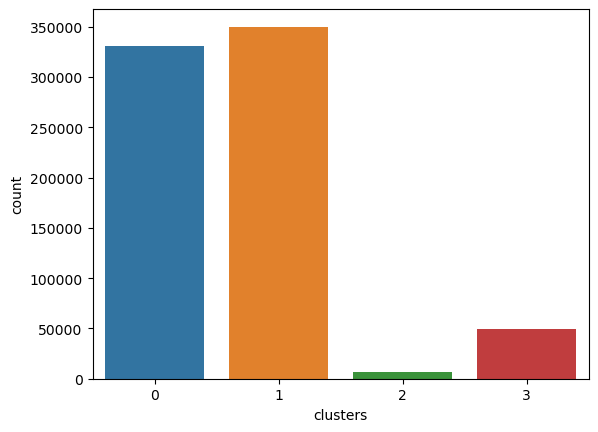

In [5]:
sns.countplot(data=df,x='clusters')

In [11]:
df.select_dtypes('number').columns

Index(['y_', 'ID', 'engine_age', 'length', 'power', 'month', 'weight', 'value',
       'value_cpi', 'price', 'y_month', 'year', 'dist', 'patch_area',
       'weight_lym', 'weight_lm', 'val_lm', 'val_lym', 'nao_index',
       'surf_temp', 'clusters'],
      dtype='object')

In [13]:
corr_list = ['ID','engine_age', 'length', 'power', 'month', 'weight', 'value',
       'value_cpi', 'price', 'y_month', 'year', 'dist', 'patch_area',
       'weight_lym', 'weight_lm', 'val_lm', 'val_lym', 'nao_index']

<AxesSubplot:>

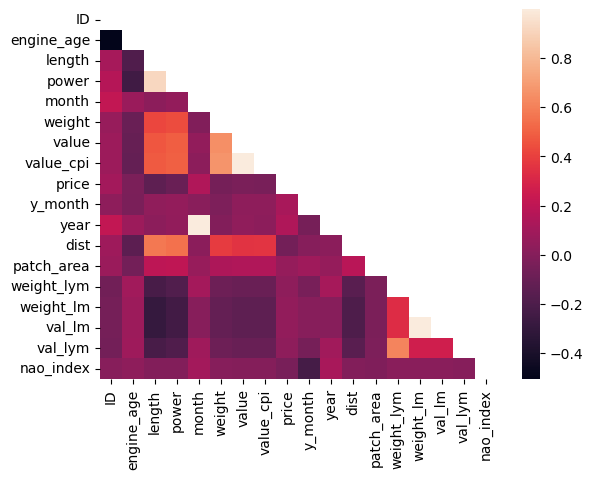

In [16]:
corr = df[['ID','engine_age', 'length', 'power', 'month', 'weight', 'value',
       'value_cpi', 'price', 'y_month', 'year', 'dist', 'patch_area',
       'weight_lym', 'weight_lm', 'val_lm', 'val_lym', 'nao_index']].corr()
mask = np.triu(corr)
sns.heatmap(corr, mask=mask)

In [46]:
df["value_divided"] = df["value"] / 1000000

In [47]:
df.groupby("clusters")['engine_age','length','power'].mean()

C:\Users\liisa\AppData\Local\Temp\ipykernel_15416\2557454051.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("clusters")['engine_age','length','power'].mean()


,engine_age,length,power
clusters,,,
Autumn Adventures,15.649824,54.992519,3762.395708
Big Value Boat Trips,12.783331,65.361013,5289.033215
Regular Roamings,24.851698,13.268280,285.891846
Trawling Tours,25.737907,10.986177,187.721804


In [48]:
df.groupby("clusters")['value_divided'].sum()

clusters
Autumn Adventures       13200.171648
Big Value Boat Trips    16178.116978
Regular Roamings         5989.007114
Trawling Tours           2010.452708
Name: value_divided, dtype: float64

In [72]:
df.groupby("clusters")['value_divided'].mean()

clusters
Autumn Adventures       0.267005
Big Value Boat Trips    2.487793
Regular Roamings        0.018103
Trawling Tours          0.005744
Name: value_divided, dtype: float64

In [38]:
df.groupby("clusters")['month'].sum()

clusters
0    39652064
1    42867741
2      843214
3     6445304
Name: month, dtype: int64

In [54]:
df.groupby("clusters")['weight','value','weight_lym','val_lym','weight_lm','val_lm'].mean()

C:\Users\liisa\AppData\Local\Temp\ipykernel_15416\1958904128.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("clusters")['weight','value','weight_lym','val_lym','weight_lm','val_lm'].mean()


,weight,value,weight_lym,val_lym,weight_lm,val_lm
clusters,,,,,,
Autumn Adventures,64288.330644,2.670046e+05,0.075994,0.045365,0.071508,0.071543
Big Value Boat Trips,826281.529708,2.487793e+06,0.081876,0.036853,0.046065,0.046091
Regular Roamings,3779.088468,1.810319e+04,0.257920,0.255244,0.029464,0.029508
Trawling Tours,719.977302,5.744249e+03,0.559309,0.486621,0.979802,0.979512


In [27]:
df.groupby("clusters")['weight','value','weight_lym','val_lym','weight_lm','val_lm'].median()

C:\Users\liisa\AppData\Local\Temp\ipykernel_11956\3982346000.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("clusters")['weight','value','weight_lym','val_lym','weight_lm','val_lm'].median()


,weight,value,weight_lym,val_lym,weight_lm,val_lm
clusters,,,,,,
0,80.00,1188.60,0.0,0.000000,0.0,0.0
1,39.00,594.30,1.0,0.121003,1.0,1.0
2,672244.00,2139975.00,0.0,0.000000,0.0,0.0
3,10405.05,84020.81,0.0,0.000000,0.0,0.0


In [53]:
df.groupby("clusters")['weight','value','weight_lym','val_lym','weight_lm','val_lm'].sum()

C:\Users\liisa\AppData\Local\Temp\ipykernel_15416\1320757227.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("clusters")['weight','value','weight_lym','val_lym','weight_lm','val_lm'].sum()


,weight,value,weight_lym,val_lym,weight_lm,val_lm
clusters,,,,,,
Autumn Adventures,3.178286e+09,1.320017e+10,3757.006296,2242.749325,3535.194023,3536.932979
Big Value Boat Trips,5.373309e+09,1.617812e+10,532.440735,239.652915,299.559235,299.727633
Regular Roamings,1.250221e+09,5.989007e+09,85326.633681,84441.331784,9747.326391,9762.135373
Trawling Tours,2.519877e+08,2.010453e+09,195754.919287,170314.265976,342924.920351,342823.204015


In [52]:
df.groupby("clusters")['dist','patch_area'].agg(['mean','count'])

C:\Users\liisa\AppData\Local\Temp\ipykernel_15416\2672098204.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("clusters")['dist','patch_area'].agg(['mean','count'])


dist           patch_area        
                            mean   count         mean   count
clusters                                                     
Autumn Adventures     593.084275   49438  4152.541142   49438
Big Value Boat Trips  879.671921    6503  5217.858066    6503
Regular Roamings       76.635346  330826  2685.692340  330826
Trawling Tours         54.854720  349994  2770.869183  349994

In [51]:
df.groupby("clusters")['patch_area'].sum()

clusters
Autumn Adventures       205293329
Big Value Boat Trips     33931731
Regular Roamings        888496854
Trawling Tours          969787589
Name: patch_area, dtype: int64

In [83]:
df.y_month

0          8
1         11
2          0
3          3
4         11
          ..
736756     3
736757     9
736758     4
736759     4
736760     6
Name: y_month, Length: 736761, dtype: int64

In [82]:
df.groupby(['clusters'])['y_month'].agg(pd.Series.mode)

clusters
Autumn Adventures       10
Big Value Boat Trips     3
Regular Roamings         3
Trawling Tours           4
Name: y_month, dtype: int64

In [37]:
df.groupby("clusters")['nao_index'].mean()

clusters
0   -0.031586
1   -0.003297
2    0.022799
3   -0.093338
Name: nao_index, dtype: float64

In [74]:
df.groupby("clusters")['patch_area_divided'].mean()

clusters
Autumn Adventures       0.004153
Big Value Boat Trips    0.005218
Regular Roamings        0.002686
Trawling Tours          0.002771
Name: patch_area_divided, dtype: float64

In [73]:
df.head()

,y_,ID,engine_age,length,power,month,landing,weight,value,value_cpi,...,patch_area,weight_lym,weight_lm,val_lm,val_lym,nao_index,surf_temp,clusters,patch_area_divided,value_divided
0,1.0,1993001257,10.0,10.50,367.0,44,RISØR,5.0,95.70,119.62,...,3229,0.000000,1.000000,1.000000,0.0,-0.070,286.90,Trawling Tours,0.003229,0.000096
1,1.0,1993005128,26.0,21.30,970.0,131,BÅTSFJORD,19.0,564.59,611.69,...,2122,0.000000,0.371367,0.359628,0.0,-1.616,276.25,Regular Roamings,0.002122,0.000565
2,1.0,1986007228,31.0,9.22,80.0,216,BRØNNØY,12.5,816.34,769.41,...,2555,0.820069,0.000000,0.000000,0.0,0.882,284.25,Regular Roamings,0.002555,0.000816
3,1.0,1992007706,15.0,10.10,210.0,87,HASVIK,2.0,16.84,19.93,...,2221,0.000000,0.000000,0.000000,0.0,1.442,279.48,Regular Roamings,0.002221,0.000017
4,1.0,1981008799,29.0,9.10,62.0,47,EIGERSUND,7.0,75.08,93.27,...,3292,0.000000,0.000000,0.000000,0.0,0.860,283.05,Regular Roamings,0.003292,0.000075


## Create custom color pallette

In [6]:
fishing = ["#0066cc","#009999","#666633",'#666699','#336600','#996633']
sns.set_palette(sns.color_palette(fishing))

In [7]:
sns.color_palette(fishing)

[(0.0, 0.4, 0.8),
 (0.0, 0.6, 0.6),
 (0.4, 0.4, 0.2),
 (0.4, 0.4, 0.6),
 (0.2, 0.4, 0.0),
 (0.6, 0.4, 0.2)]

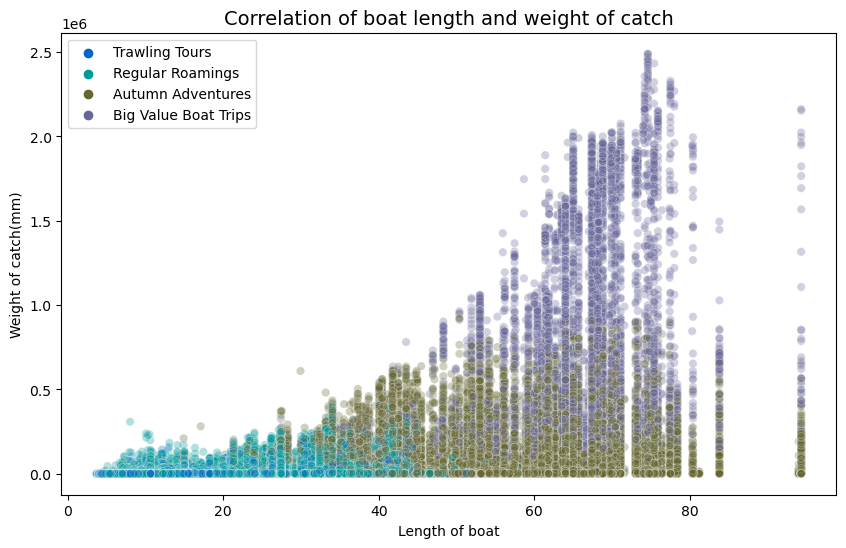

In [153]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='length',y='weight',hue='clusters',alpha=0.3)
plt.title("Correlation of boat length and weight of catch", fontsize = 14)
plt.ylabel('Weight of catch(mm)')
plt.xlabel('Length of boat')
plt.legend(loc = "upper left", fontsize = 10)
plt.savefig('corr_len_weight.png',bbox_inches='tight')

plt.show()

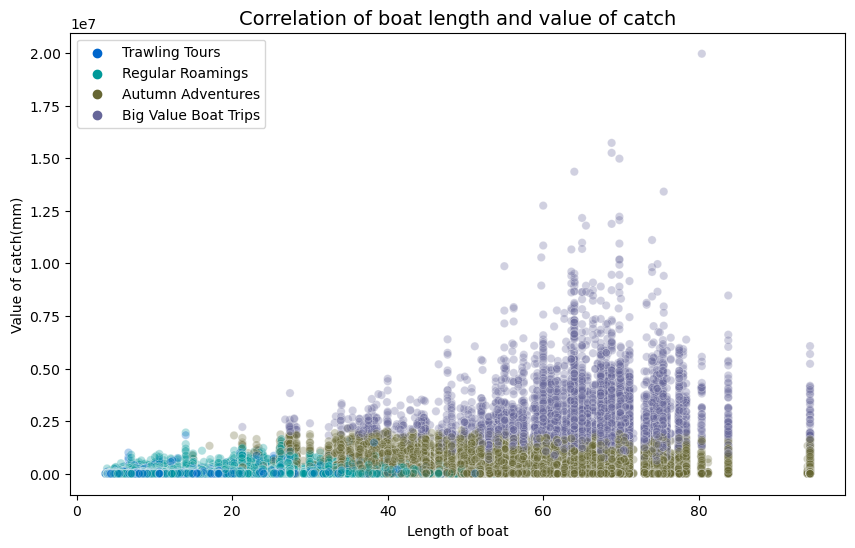

In [154]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='length',y='value',hue='clusters',alpha=0.3)
plt.title("Correlation of boat length and value of catch", fontsize = 14)
plt.ylabel('Value of catch(mm)')
plt.xlabel('Length of boat')
plt.legend(loc = "upper left", fontsize = 10)
plt.savefig('corr_len_value.png',bbox_inches='tight')

plt.show()

<AxesSubplot:xlabel='power', ylabel='value'>

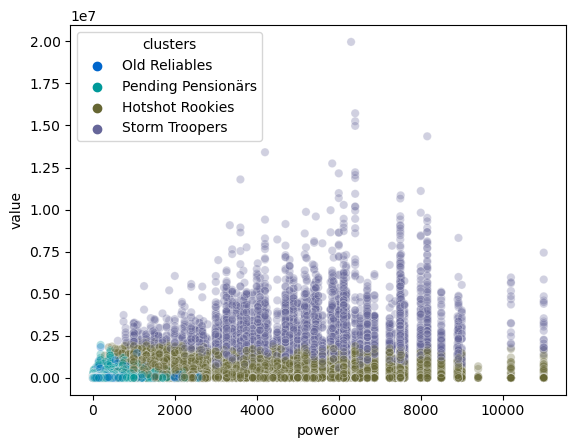

In [132]:
sns.scatterplot(data=df, x='power',y='value',hue='clusters',alpha=0.3)

## Chart the prevelance of the Autumn Adventures in October

In [16]:
df_reg = df.loc[df.clusters == "Regular Roamings"]
df_aut = df.loc[df.clusters == "Autumn Adventures"]
df_traw = df.loc[df.clusters == "Trawling Tours"]
df_big = df.loc[df.clusters == "Big Value Boat Trips"]

<AxesSubplot:xlabel='y_month', ylabel='Count'>

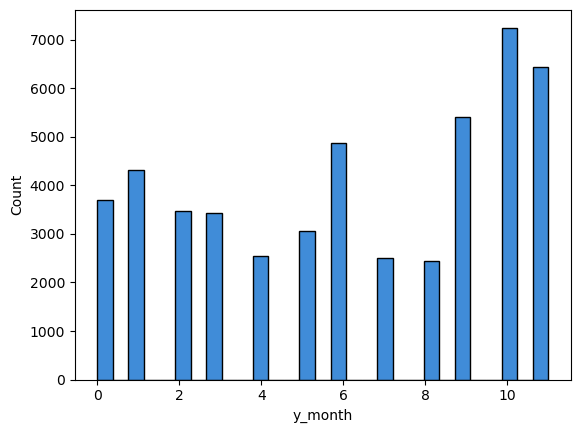

In [32]:
sns.histplot(data=df_aut, x='y_month')

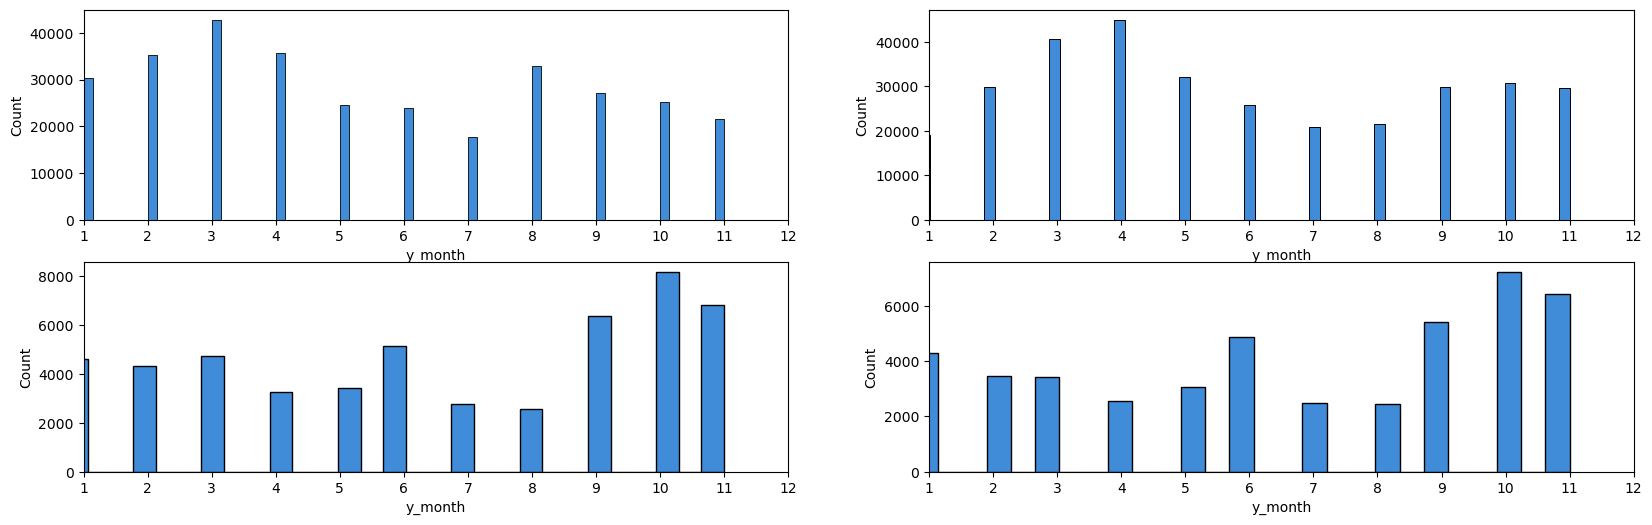

In [45]:
fig, ax = plt.subplots(2,2, figsize=(20,6))

sns.histplot(data=df_reg,x='y_month', ax=ax[0][0])
ax[0][0].set_xlim(1,12)
ax[0][0].set_xticks(range(1,13))

sns.histplot(data=df_traw,x='y_month', ax=ax[0][1])
ax[0][1].set_xlim(1,12)
ax[0][1].set_xticks(range(1,13))

sns.histplot(data=df_big,x='y_month', ax=ax[1][0])
ax[1][0].set_xlim(1,12)
ax[1][0].set_xticks(range(1,13))

sns.histplot(data=df_aut,x='y_month', ax=ax[1][1])
ax[1][1].set_xlim(1,12)
ax[1][1].set_xticks(range(1,13))

plt.show()


In [87]:
test_plot = df.groupby(["clusters","y_month"])["ID"].count()

In [89]:
test_plot = pd.DataFrame(test_plot).reset_index()

In [90]:
test_plot.head()

,clusters,y_month,ID
0,Autumn Adventures,0,3695
1,Autumn Adventures,1,4310
2,Autumn Adventures,2,3474
3,Autumn Adventures,3,3426
4,Autumn Adventures,4,2546


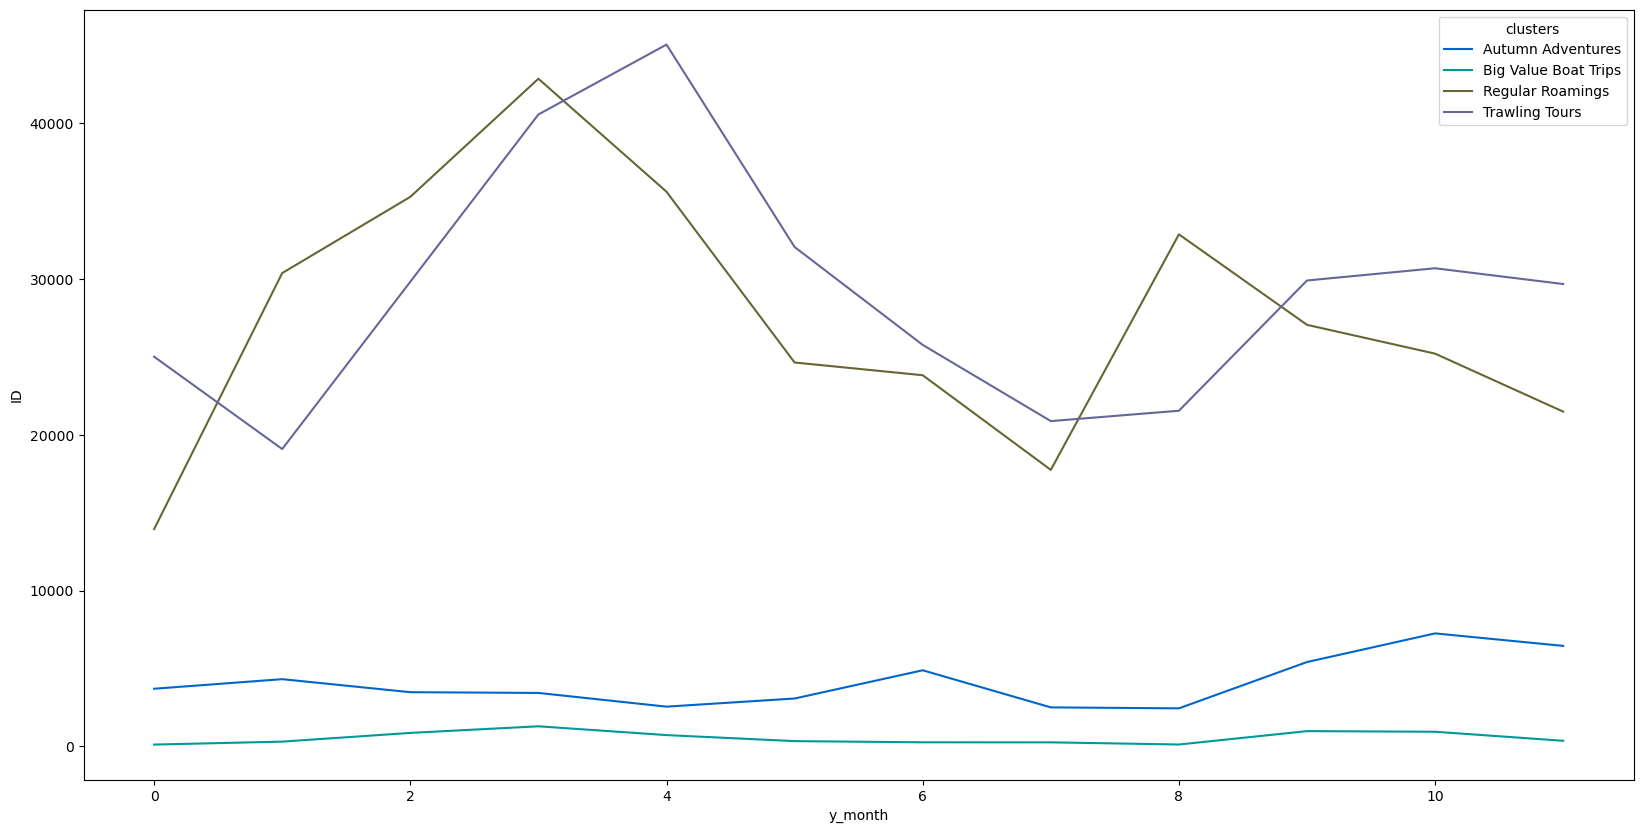

In [109]:
plt.figure(figsize=(20,10))
sns.lineplot(data=test_plot,x="y_month",y="ID",hue="clusters")
plt.savefig('months.png',bbox_inches='tight')
plt.show()


<AxesSubplot:xlabel='y_month', ylabel='Count'>

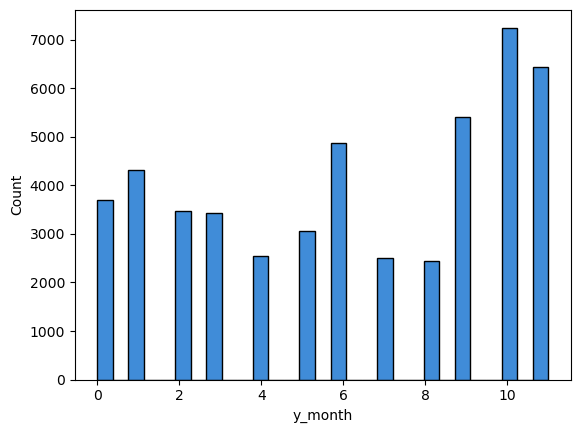

In [78]:
sns.histplot(data=df_aut,x='y_month')

<AxesSubplot:xlabel='y_month', ylabel='Count'>

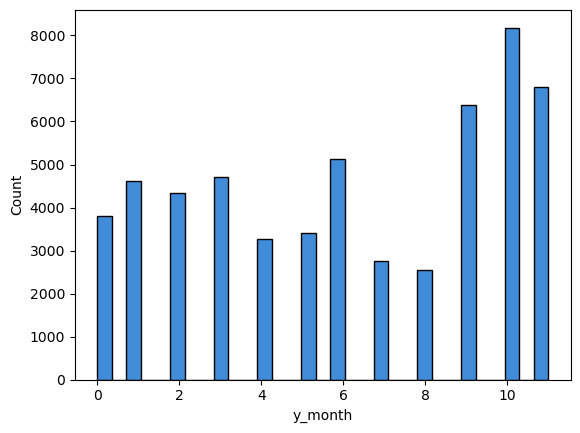

In [81]:
sns.histplot(data=df_big,x='y_month')

In [39]:
# cluster 0 = Regular Roamings
# cluster 1 = Trawling Tours
# cluster 2 = Big Value Boat Trips
# cluster 3 = Autumn Adventures
    

Positive NAO Index:

Winds from the west dominate, bringing with them warm air, while the position of the jet stream enables stronger and more frequent storms to travel across the Atlantic

These support mild, stormy and wet winter conditions in northern Europe and eastern US. Conversely, northern Canada, Greenland and southern Europe are prone to cold and dry winter conditions.

In [14]:
# Change the cluster values to the new names

cluster_dict = {0: "Regular Roamings", 1: "Trawling Tours", 2:"Big Value Boat Trips", 3:"Autumn Adventures"}

In [15]:
df['clusters'] = df['clusters'].map(cluster_dict)    

### Create visualizations for Regular Roamings

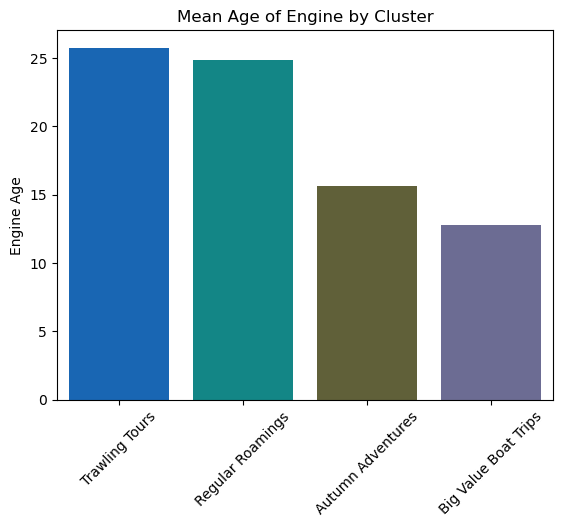

In [138]:
fig, ax = plt.subplots(1,1)
sns.barplot(data=df, x='clusters',y='engine_age',ci=False)
plt.title('Mean Age of Engine by Cluster')
plt.ylabel('Engine Age')
plt.xticks(rotation=45)
ax.set(xlabel=None)
plt.savefig('engine age.png',bbox_inches='tight')

plt.show()


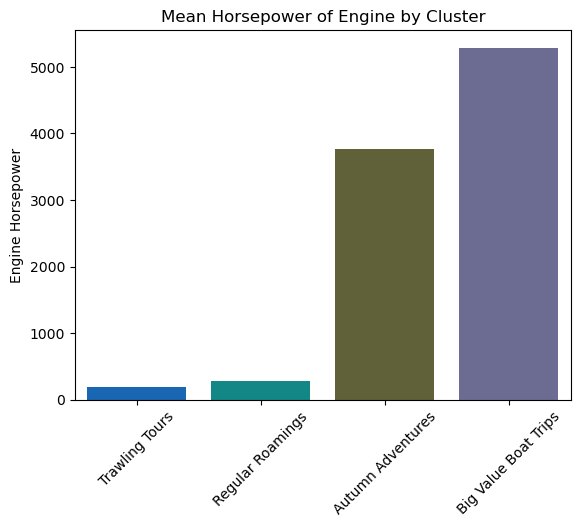

In [139]:
fig, ax = plt.subplots(1,1)
sns.barplot(data=df, x='clusters',y='power',ci=False)
plt.title('Mean Horsepower of Engine by Cluster')
plt.ylabel('Engine Horsepower')
plt.xticks(rotation=45)
ax.set(xlabel=None)
plt.savefig('horsepower.png',bbox_inches='tight')
plt.show()

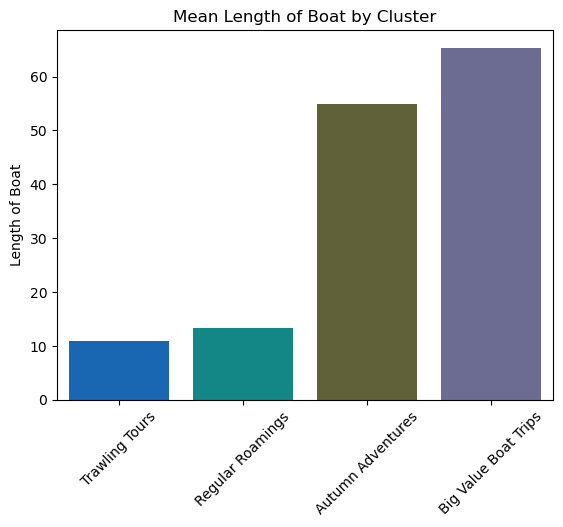

In [140]:
fig, ax = plt.subplots(1,1)
sns.barplot(data=df, x='clusters',y='length',ci=False)
plt.title('Mean Length of Boat by Cluster')
plt.ylabel('Length of Boat')
plt.xticks(rotation=45)
ax.set(xlabel=None)
plt.savefig('length.png',bbox_inches='tight')

plt.show()


In [55]:
Regular_roamings_area = df.loc[df.clusters == "Regular Roamings"]['patch_area_divided']
Trawling_tours_area = df.loc[df.clusters == "Trawling Tours"]['patch_area_divided']
Big_value_boat_trips_area = df.loc[df.clusters == "Big Value Boat Trips"]['patch_area_divided']
Autumn_adventures_area = df.loc[df.clusters == "Autumn Adventures"]['patch_area_divided']

In [76]:
import squarify

In [83]:
area_cat = df.groupby("clusters")['patch_area'].count()

In [146]:
area_cat.index

Index(['Autumn Adventures', 'Big Value Boat Trips', 'Regular Roamings',
       'Trawling Tours'],
      dtype='object', name='clusters')

In [147]:
test = ['Autumn\nAdventures', 'Big Value\nBoat Trips', 'Regular Roamings',
       'Trawling Tours']

area_cat.index

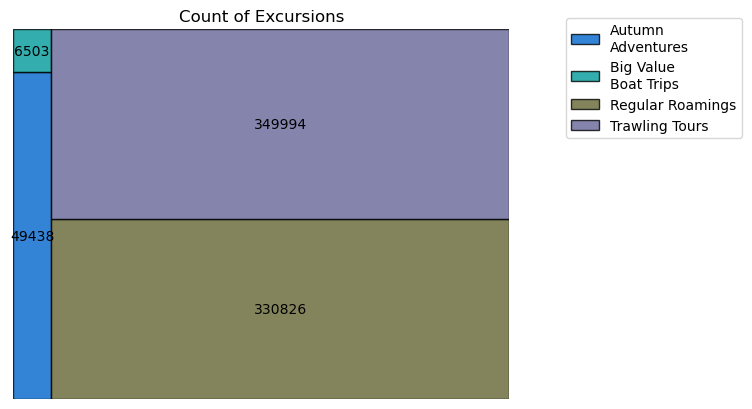

In [152]:
numbers = [49438,6503,330826,349994]

ax = squarify.plot(sizes=area_cat, label=numbers,alpha=.8,ec = 'black',color=fishing)
ax.get_xaxis().set_visible(False)
plt.axis("off")
plt.title("Count of Excursions")
#plt.legend(handles=ax.containers[0], labels=labels)
ax.legend(handles=ax.containers[0], labels=test, bbox_to_anchor=(1.1, 1.05))
plt.savefig('count_excur.png',bbox_inches='tight')

plt.show()


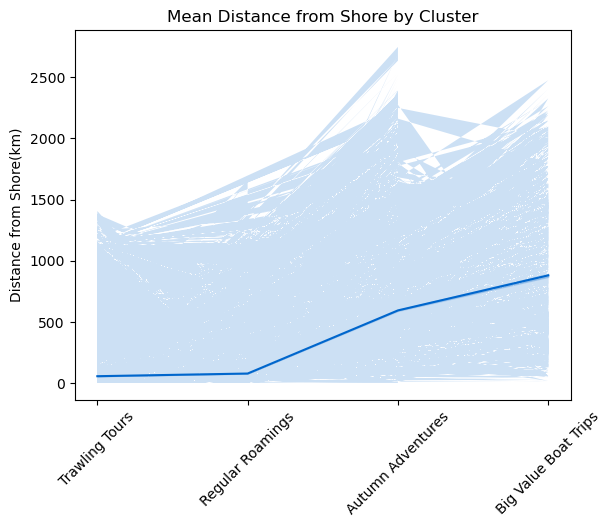

In [142]:
sns.lineplot(data=df,x='clusters',y='dist')
plt.fill_between(df['clusters'], df['dist'], alpha=0.2)
plt.title('Mean Distance from Shore by Cluster')
plt.ylabel('Distance from Shore(km)')
plt.xticks(fontsize=10,rotation=45)
plt.xlabel("")
plt.savefig('dist.png',bbox_inches='tight')

plt.show()

In [39]:
df_big = df.loc[df.clusters.isin(['Autumn Adventures','Big Value Boat Trips'])]

In [40]:
big_area_cat = df_big.groupby("clusters")['patch_area'].agg(['count','mean'])
big_area_cat

,count,mean
clusters,,
Autumn Adventures,49438,4152.541142
Big Value Boat Trips,6503,5217.858066


In [55]:
df_small = df.loc[df.clusters.isin(['Trawling Tours','Regular Roamings'])]

In [58]:
small_area_cat = df_small.groupby("clusters")['value','weight'].mean().round()

C:\Users\liisa\AppData\Local\Temp\ipykernel_15416\3436753205.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  small_area_cat = df_small.groupby("clusters")['value','weight'].mean().round()


In [61]:
small_area_cat

,value,weight
clusters,,
Regular Roamings,18103.0,3779.0
Trawling Tours,5744.0,720.0


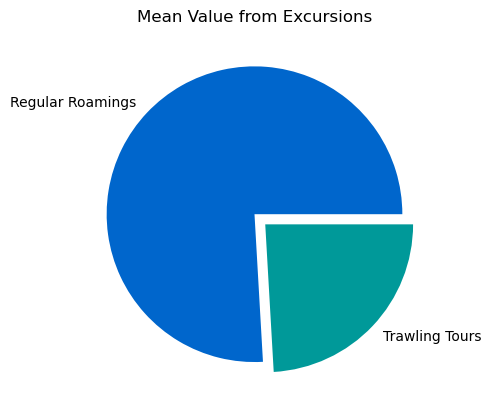

In [95]:
small_area_cat["value"].plot.pie(explode=[0,0.1], label="")
plt.title('Mean Value from Excursions')
plt.savefig('pie_value.png',bbox_inches='tight')
plt.show()


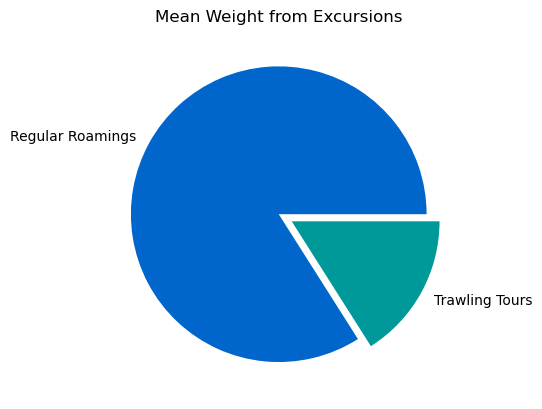

In [96]:
small_area_cat["weight"].plot.pie(explode=[0,0.1],label="")
plt.title('Mean Weight from Excursions')
plt.savefig('pie_weight.png',bbox_inches='tight')
plt.show()